Dataset shape after preprocessing: (20640, 13)
Linear Regression Results
Training MAE: 49723.37, R²: 0.65
Validation MAE: 51140.01, R²: 0.61
Testing MAE: 49016.19, R²: 0.66


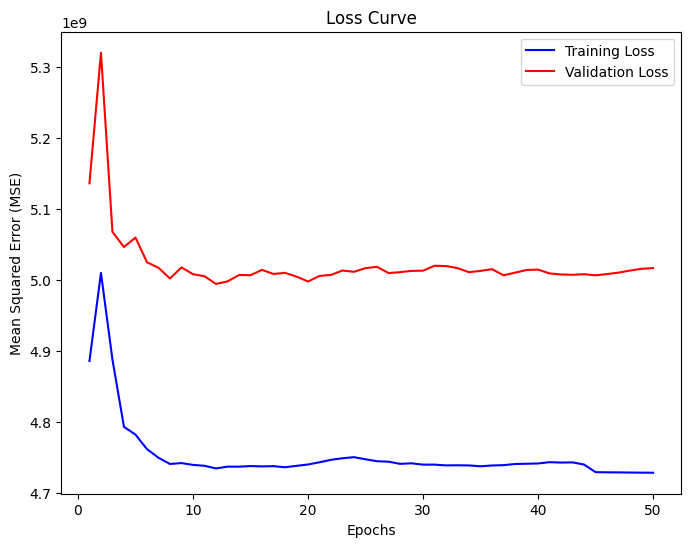

In [1]:
# Try Linear .....
# استيراد المكتبات اللازمة
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# تحميل البيانات
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# معالجة القيم المفقودة (ملء القيم المفقودة بالقيمة الوسيطة)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# تشفير العمود النصي 'ocean_proximity'
data = pd.get_dummies(data, drop_first=True)
print("Dataset shape after preprocessing:", data.shape)

# تقسيم البيانات إلى متغيرات مستقلة (X) والهدف (y)
y = data['median_house_value']
X = data.drop('median_house_value', axis=1)

# تطبيع البيانات
scaler = StandardScaler() between 0 and 1 
X_scaled = scaler.fit_transform(X) # (x-M)/standard d....

# تقسيم البيانات إلى: تدريب، فاليديشن، تيست
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# إنشاء نموذج الانحدار الخطي
lin_reg = LinearRegression()

# تدريب النموذج
train_losses, val_losses = [], []

# محاكاة الـ loss curve من خلال التدريب المتكرر
for i in range(1, 51):  # عدد الدفعات 50
    lin_reg.fit(X_train[:i*len(X_train)//50], y_train[:i*len(y_train)//50])  # تدريب تدريجي
    train_pred = lin_reg.predict(X_train)
    val_pred = lin_reg.predict(X_val)
    train_losses.append(mean_squared_error(y_train, train_pred))
    val_losses.append(mean_squared_error(y_val, val_pred))

# التنبؤ على البيانات المختلفة
y_train_pred = lin_reg.predict(X_train)
y_val_pred = lin_reg.predict(X_val)
y_test_pred = lin_reg.predict(X_test)

# حساب مؤشرات الأداء
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# طباعة النتائج
print("Linear Regression Results")
print(f"Training MAE: {train_mae:.2f}, R²: {train_r2:.2f}")
print(f"Validation MAE: {val_mae:.2f}, R²: {val_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# رسم منحنى الخسارة (Loss Curve)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, 51), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.show()



KNN Model Results
Training R² Score: 0.7849326072697088
Validation R² Score: 0.6946892551399781
Test R² Score: 0.7272978733512669
Training MAE: 34933.87392140906
Validation MAE: 41166.35983686123
Test MAE: 39812.49475986046


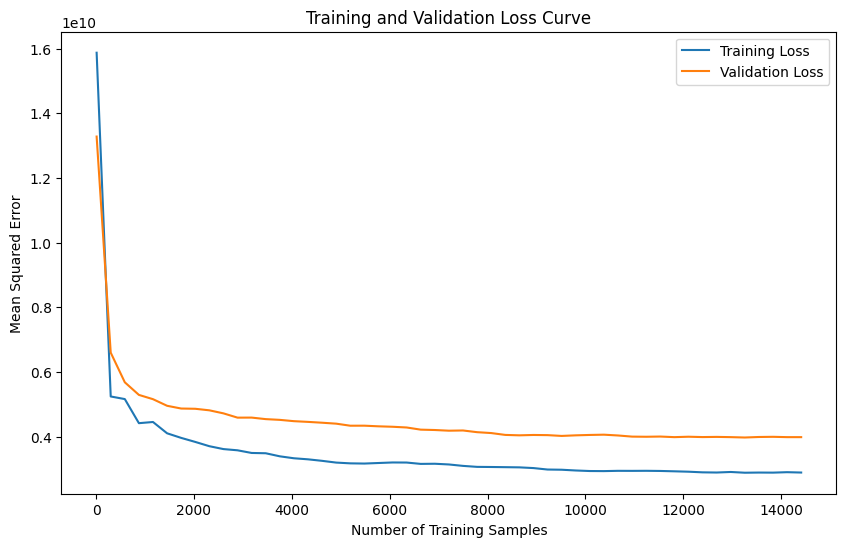

In [1]:
## KNN Model 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# تحميل البيانات
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# معالجة القيم المفقودة
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# تشفير العمود النصي 'ocean_proximity'
data = pd.get_dummies(data, drop_first=True)

# تقسيم البيانات إلى متغيرات مستقلة (X) والهدف (y)
y = np.log1p(data['median_house_value'])  # تطبيق log لتقليل التأثيرات الكبيرة
X = data.drop('median_house_value', axis=1)

# تطبيع البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات إلى تدريب، تحقق واختبار
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# قوائم لتخزين الخسائر
train_losses = []
val_losses = []

# تدريب نموذج KNN وتقييم الخسارة تدريجيًا
for i in range(10, len(X_train) + 1, len(X_train)//50):  # البدء من 10 عينات لتجنب الأخطاء
    knn_regressor = KNeighborsRegressor(n_neighbors=min(7, i))  # ضبط n_neighbors
    knn_regressor.fit(X_train[:i], y_train[:i])
    
    # التنبؤ على مجموعة التدريب والتحقق
    y_train_pred = knn_regressor.predict(X_train[:i])
    y_val_pred = knn_regressor.predict(X_val)
    
    # حساب الخسارة (MSE)
    train_loss = mean_squared_error(np.expm1(y_train[:i]), np.expm1(y_train_pred))
    val_loss = mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# تدريب النموذج النهائي على كامل بيانات التدريب
knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train, y_train)

# التنبؤ على كل جزء
y_train_pred = knn_regressor.predict(X_train)
y_val_pred = knn_regressor.predict(X_val)
y_test_pred = knn_regressor.predict(X_test)

# حساب المقاييس لكل جزء
r2_train = r2_score(np.expm1(y_train), np.expm1(y_train_pred))
r2_val = r2_score(np.expm1(y_val), np.expm1(y_val_pred))
r2_test = r2_score(np.expm1(y_test), np.expm1(y_test_pred))

mae_train = mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred))
mae_val = mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred))
mae_test = mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))

# طباعة النتائج
print("\nKNN Model Results")
print(f"Training R² Score: {r2_train}")
print(f"Validation R² Score: {r2_val}")
print(f"Test R² Score: {r2_test}")
print(f"Training MAE: {mae_train}")
print(f"Validation MAE: {mae_val}")
print(f"Test MAE: {mae_test}")

# رسم Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(10, len(X_train) + 1, len(X_train)//50), train_losses, label='Training Loss')
plt.plot(range(10, len(X_train) + 1, len(X_train)//50), val_losses, label='Validation Loss')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()




Random Forest Results
Training R² Score: 0.9678, MAE: 12539.95
Validation R² Score: 0.8000, MAE: 31325.16
Test R² Score: 0.8339, MAE: 30098.79


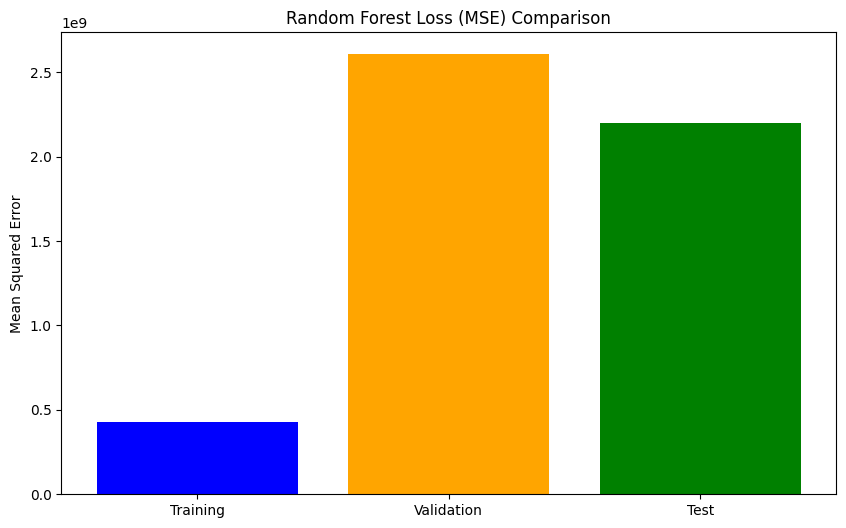

In [2]:
# RandomForest model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# تحميل البيانات
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# معالجة القيم المفقودة
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# تشفير العمود النصي 'ocean_proximity'
data = pd.get_dummies(data, drop_first=True)

# تقسيم البيانات إلى متغيرات مستقلة (X) والهدف (y)
y = np.log1p(data['median_house_value'])  # تقليل التأثير الكبير للقيم العالية
X = data.drop('median_house_value', axis=1)

# تطبيع البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات إلى تدريب، تحقق، واختبار
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ضبط معلمات Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# تدريب Random Forest
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_

# التنبؤ بالقيم
y_train_pred = best_rf_model.predict(X_train)
y_val_pred = best_rf_model.predict(X_val)
y_test_pred = best_rf_model.predict(X_test)

# تقييم النموذج
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))
    r2 = r2_score(np.expm1(y_true), np.expm1(y_pred))
    return mae, r2

mae_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, r2_test = evaluate_model(y_test, y_test_pred)

# طباعة النتائج
print("\nRandom Forest Results")
print(f"Training R² Score: {r2_train:.4f}, MAE: {mae_train:.2f}")
print(f"Validation R² Score: {r2_val:.4f}, MAE: {mae_val:.2f}")
print(f"Test R² Score: {r2_test:.4f}, MAE: {mae_test:.2f}")

# رسم Loss Curve (MSE)
train_mse = mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred))
val_mse = mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred))
test_mse = mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred))

plt.figure(figsize=(10, 6))
plt.bar(['Training', 'Validation', 'Test'], [train_mse, val_mse, test_mse], color=['blue', 'orange', 'green'])
plt.title('Random Forest Loss (MSE) Comparison')
plt.ylabel('Mean Squared Error')
plt.show()



XGBoost Results
Training R² Score: 0.9858, MAE: 8651.74
Validation R² Score: 0.8239, MAE: 29600.33
Test R² Score: 0.8510, MAE: 28360.41


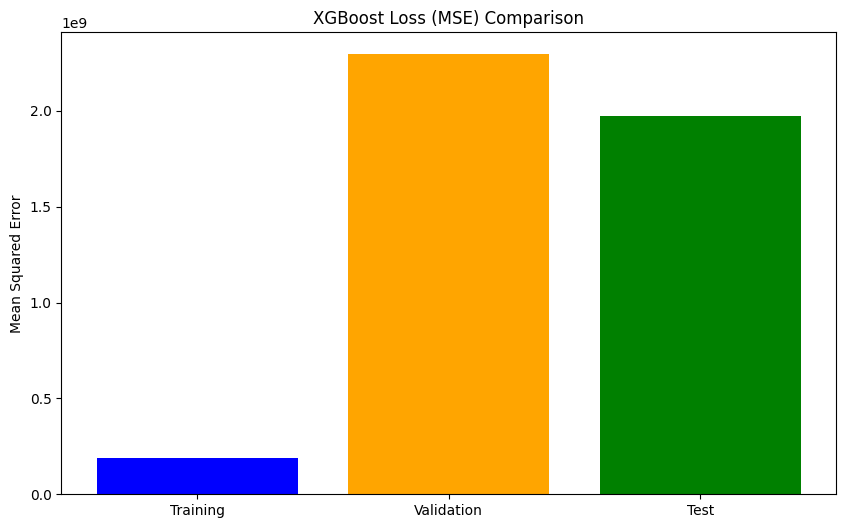

In [3]:
#GXboost model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# تحميل البيانات
data = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# معالجة القيم المفقودة
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# تشفير العمود النصي 'ocean_proximity'
data = pd.get_dummies(data, drop_first=True)

# تقسيم البيانات إلى متغيرات مستقلة (X) والهدف (y)
y = np.log1p(data['median_house_value'])  # يمكن تطبيق log لتقليل التأثيرات
X = data.drop('median_house_value', axis=1)

# تطبيع البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ضبط معلمات XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# تدريب XGBoost
xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_

# التنبؤ بالقيم
y_train_pred = best_xgb_model.predict(X_train)
y_val_pred = best_xgb_model.predict(X_val)
y_test_pred = best_xgb_model.predict(X_test)

# تقييم النموذج
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))
    r2 = r2_score(np.expm1(y_true), np.expm1(y_pred))
    return mae, r2

mae_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, r2_test = evaluate_model(y_test, y_test_pred)

# طباعة النتائج
print("\nXGBoost Results")
print(f"Training R² Score: {r2_train:.4f}, MAE: {mae_train:.2f}")
print(f"Validation R² Score: {r2_val:.4f}, MAE: {mae_val:.2f}")
print(f"Test R² Score: {r2_test:.4f}, MAE: {mae_test:.2f}")

# رسم Loss Curve (MSE)
train_mse = mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred))
val_mse = mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred))
test_mse = mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred))

plt.figure(figsize=(10, 6))
plt.bar(['Training', 'Validation', 'Test'], [train_mse, val_mse, test_mse], color=['blue', 'orange', 'green'])
plt.title('XGBoost Loss (MSE) Comparison')
plt.ylabel('Mean Squared Error')
plt.show()
